# **Lesson 10**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

# Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

## Solution

In [12]:
i_circ, x_circ, y_circ = np.loadtxt('10.1/cities_circle.tsv', delimiter='\t', skiprows=1, unpack=True, usecols=(0,1,2))
data_circ = np.loadtxt('10.1/Output/opt_circle_rank=0.csv', delimiter=',', skiprows=1)
gens = data_circ[:,0]
#best_losses_circ = data_circ[:,1]
index_circ = np.array(data_circ[:,2:])
loss_circ = np.loadtxt('10.1/Output/loss_circle_rank=0.csv', delimiter=',', skiprows=1)
loss_circ = np.array(loss_circ[:,1:])

i_square, x_square, y_square = np.loadtxt('10.1/cities_square.tsv', delimiter='\t', skiprows=1, unpack=True, usecols=(0,1,2))
data_square = np.loadtxt('10.1/Output/opt_square_rank=0.csv', delimiter=',', skiprows=1)
#gens = data_square[:,0]
#best_losses_square = data_square[:,1]
index_square = np.array(data_square[:,2:])
loss_square = np.loadtxt('10.1/Output/loss_square_rank=0.csv', delimiter=',', skiprows=1)
loss_square = np.array(loss_square[:,1:])

In [13]:
pop_size = int(loss_circ.shape[1])

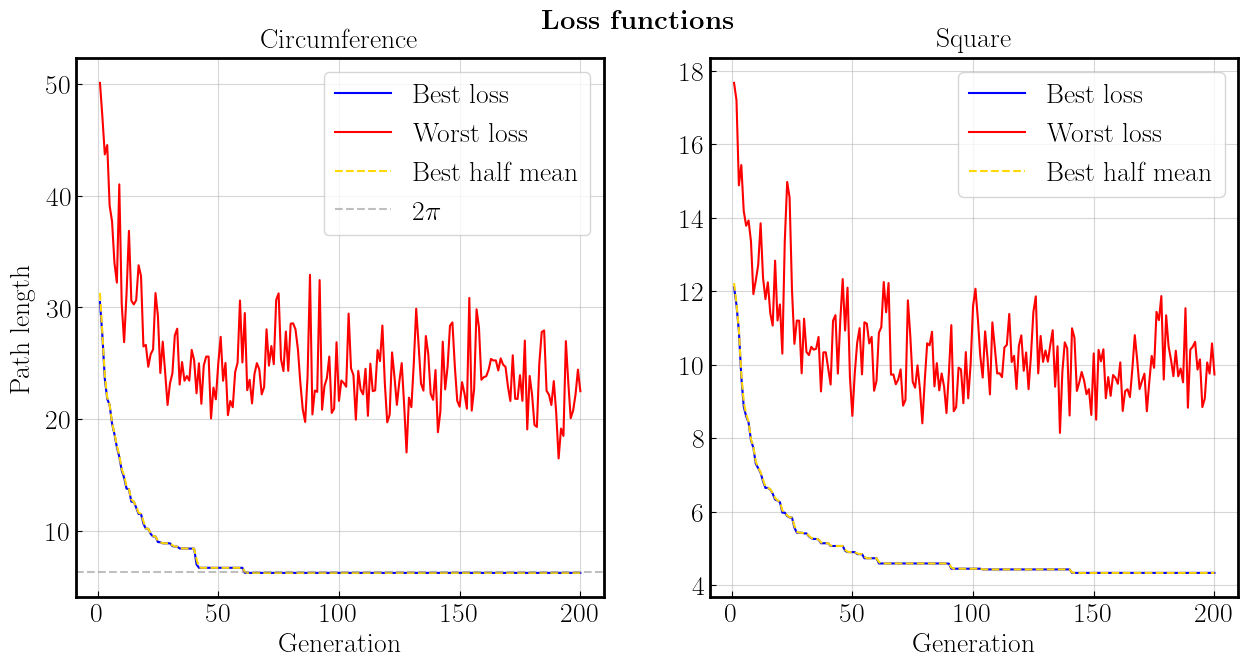

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.suptitle(r'\textbf{Loss functions}', y=0.95)

axs[0].plot(gens, loss_circ[:,0], c='b', label='Best loss')
axs[0].plot(gens, loss_circ[:,-1], c='r', label='Worst loss')
axs[0].plot(gens, np.mean(loss_circ[:,:int(pop_size/2)], axis=1), c='gold', ls='--', label='Best half mean')
axs[0].axhline(2*np.pi, c='grey', ls='--', alpha=0.5, label='$2\pi$')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Path length', labelpad=8)
axs[0].set_title('Circumference', pad=8)
axs[0].legend()

axs[1].plot(gens, loss_square[:,0], c='b', label='Best loss')
axs[1].plot(gens, loss_square[:,-1], c='r', label='Worst loss')
axs[1].plot(gens, np.mean(loss_square[:,:int(pop_size/2)], axis=1), c='gold', ls='--', label='Best half mean')
axs[1].set_xlabel('Generation')
axs[1].set_title('Square', pad=8)
axs[1].legend()

plt.show()

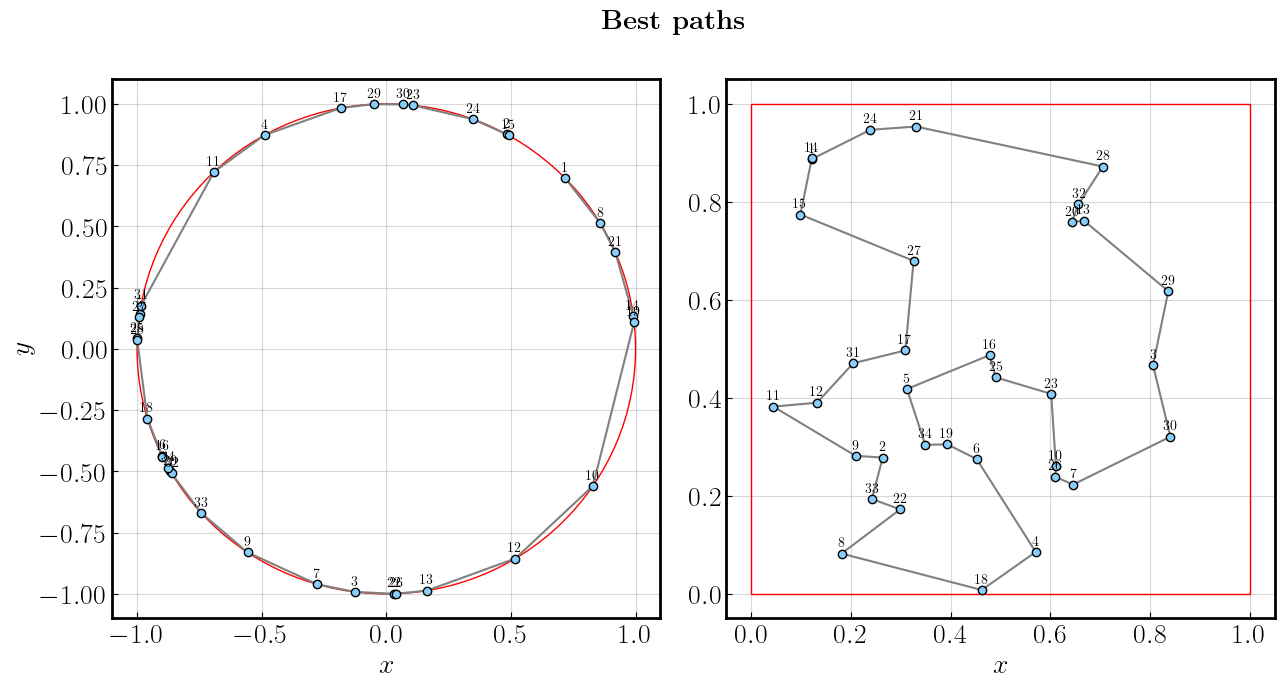

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,7), gridspec_kw={'wspace':0.12})
fig.suptitle(r'\textbf{Best paths}')

circle = patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none')
axs[0].add_patch(circle)
ord_x_circ = x_circ[index_circ[-1,:].astype(int)]
ord_y_circ = y_circ[index_circ[-1,:].astype(int)]
axs[0].plot(ord_x_circ, ord_y_circ, color='grey', zorder=1)
axs[0].scatter(x_circ, y_circ, c='lightskyblue', zorder=2)

for i, (x, y) in enumerate(zip(x_circ, y_circ)):
    axs[0].annotate(f'{i_circ[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')

square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
axs[1].add_patch(square)
ord_x_square = x_square[index_square[-1,:].astype(int)]
ord_y_square = y_square[index_square[-1,:].astype(int)]
axs[1].plot(ord_x_square, ord_y_square, color='grey', zorder=1)
axs[1].scatter(x_square, y_square, c='lightskyblue', zorder=2)

for i, (x, y) in enumerate(zip(x_square, y_square)):
    axs[1].annotate(f'{i_square[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

axs[1].set_xlabel('$x$')

plt.show()

# Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

## Solution

In [16]:
best_rank_mig = 1
best_rank_ind = 1
n_migr = 20

In [17]:
i_ita, x_ita, y_ita = np.loadtxt('10.2/cities_italy.tsv', delimiter='\t', skiprows=1, unpack=True, usecols=(0,1,2))

data_ita_mig = np.loadtxt('10.2/Output/opt_italy_rank=' +str(best_rank_mig)+ '_migr=' +str(n_migr)+ '.csv', delimiter=',', skiprows=1)
gens_ita_mig = data_ita_mig[:,0]
#best_losses_ita_mig = data_ita_mig[:,1]
index_ita_mig = np.array(data_ita_mig[:,2:])
loss_ita_mig = np.loadtxt('10.2/Output/loss_italy_rank=' +str(best_rank_mig)+ '_migr=' +str(n_migr)+'.csv', delimiter=',', skiprows=1)
loss_ita_mig = np.array(loss_ita_mig[:,1:])

data_ita_ind = np.loadtxt('10.2/Output/opt_italy_rank=' +str(best_rank_ind)+ '_migr=0.csv', delimiter=',', skiprows=1)
gens_ita_ind = data_ita_ind[:,0]
#best_losses_ita_ind = data_ita_ind[:,1]
index_ita_ind = np.array(data_ita_ind[:,2:])
loss_ita_ind = np.loadtxt('10.2/Output/loss_italy_rank=' +str(best_rank_ind)+ '_migr=0.csv', delimiter=',', skiprows=1)
loss_ita_ind = np.array(loss_ita_ind[:,1:])

In [18]:
pop_size_ita = int(loss_ita_mig.shape[1])

In [19]:
def italy_map(ax) :
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
    ax.add_feature(cfeature.LAND, facecolor='darkseagreen')
    ax.add_feature(cfeature.COASTLINE, color='black', lw=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)

    return ax

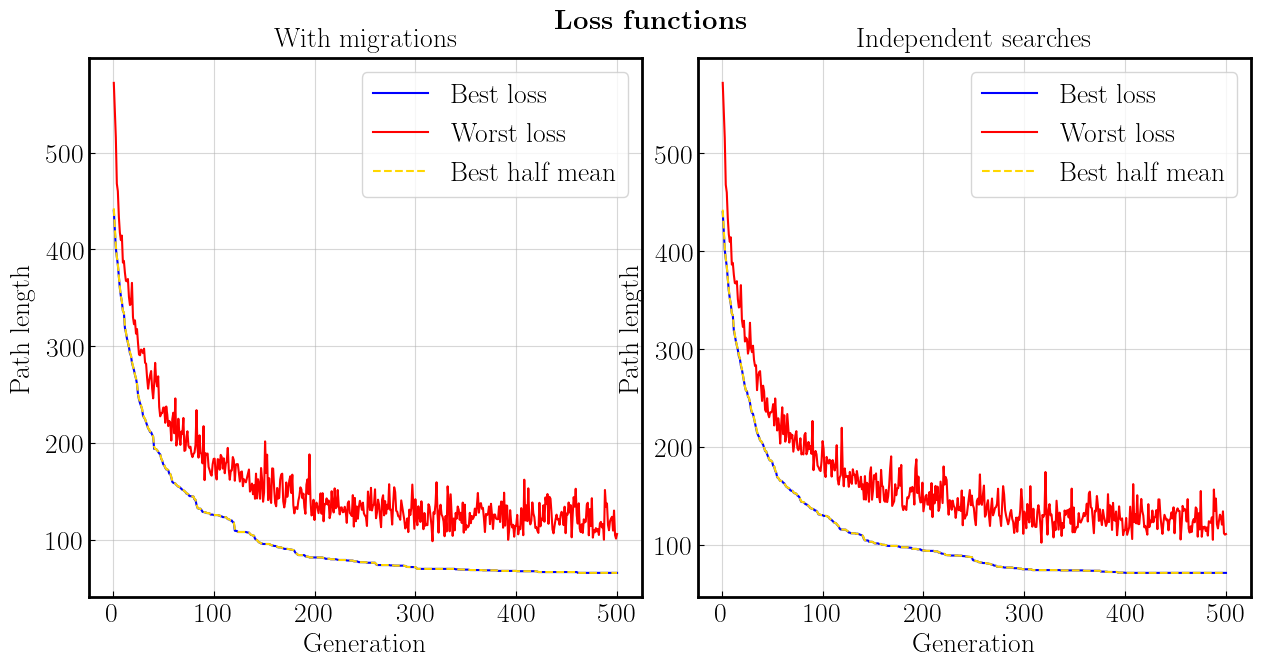

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,7), gridspec_kw={'wspace': 0.1})
plt.suptitle(r'\textbf{Loss functions}', y=0.95)

axs[0].plot(gens_ita_mig, loss_ita_mig[:,0], c='b', label='Best loss')
axs[0].plot(gens_ita_mig, loss_ita_mig[:,-1], c='r', label='Worst loss')
axs[0].plot(gens_ita_mig, np.mean(loss_ita_mig[:,:int(pop_size/2)], axis=1), c='gold', ls='--', label='Best half mean')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Path length', labelpad=8)
axs[0].set_title('With migrations', pad=8)
axs[0].legend()

axs[1].plot(gens_ita_ind, loss_ita_ind[:,0], c='b', label='Best loss')
axs[1].plot(gens_ita_ind, loss_ita_ind[:,-1], c='r', label='Worst loss')
axs[1].plot(gens_ita_ind, np.mean(loss_ita_ind[:,:int(pop_size/2)], axis=1), c='gold', ls='--', label='Best half mean')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Path length', labelpad=8)
axs[1].set_title('Independent searches', pad=8)
axs[1].legend()

plt.show()

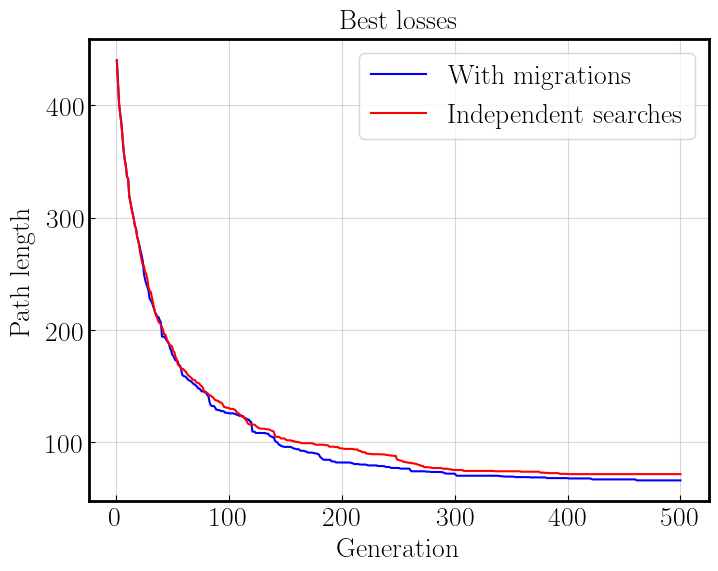

In [21]:
plt.plot(gens_ita_mig, loss_ita_mig[:,0], c='b', label='With migrations')
plt.plot(gens_ita_ind, loss_ita_ind[:,0], c='r', label='Independent searches')
plt.xlabel('Generation')
plt.ylabel('Path length', labelpad=8)
plt.title('Best losses', pad=8)
plt.legend()

plt.show()

/opt/homebrew/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


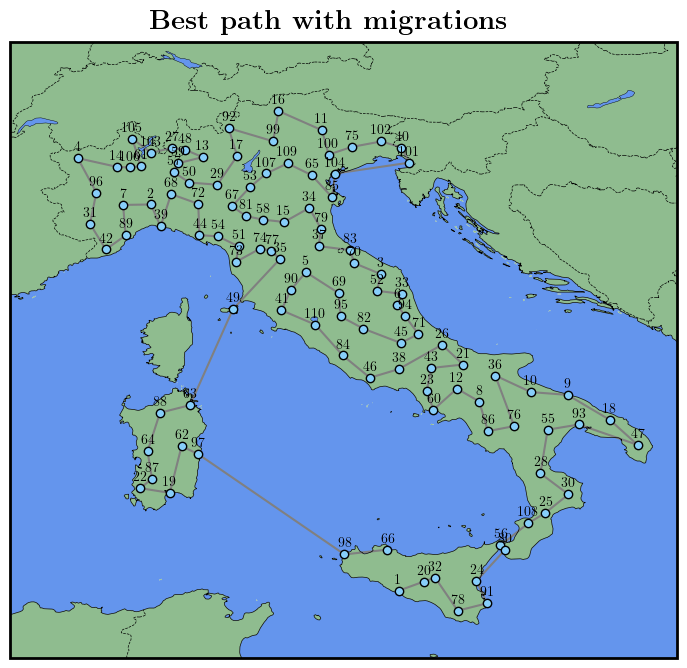

In [27]:
fig = plt.figure(figsize=(12,8))
fig.suptitle(r'\textbf{Best path with migrations}', y=0.92)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
ax.add_feature(cfeature.LAND, facecolor='darkseagreen')
ax.add_feature(cfeature.COASTLINE, color='black', lw=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)


ord_x_ita = x_ita[index_ita_mig[-1,:].astype(int)]
ord_y_ita = y_ita[index_ita_mig[-1,:].astype(int)]
ax.plot(ord_x_ita, ord_y_ita, color='grey', zorder=1)
ax.scatter(x_ita, y_ita, c='lightskyblue', zorder=2)

for i, (x, y) in enumerate(zip(x_ita, y_ita)):
    ax.annotate(f'{i_ita[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')


plt.show()

/opt/homebrew/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


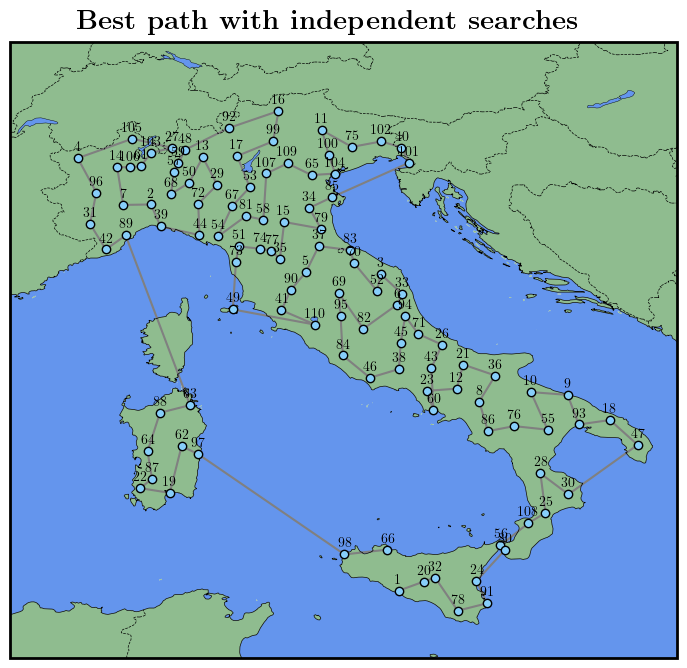

In [28]:
fig = plt.figure(figsize=(12,8))
fig.suptitle(r'\textbf{Best path with independent searches}', y=0.92)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
ax.add_feature(cfeature.LAND, facecolor='darkseagreen')
ax.add_feature(cfeature.COASTLINE, color='black', lw=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)


ord_x_ita = x_ita[index_ita_ind[-1,:].astype(int)]
ord_y_ita = y_ita[index_ita_ind[-1,:].astype(int)]
ax.plot(ord_x_ita, ord_y_ita, color='grey', zorder=1)
ax.scatter(x_ita, y_ita, c='lightskyblue', zorder=2)

for i, (x, y) in enumerate(zip(x_ita, y_ita)):
    ax.annotate(f'{i_ita[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')


plt.show()